In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

sns.set()

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Modules were loaded.')

Modules were loaded.


In [155]:
df = pd.read_csv('./ibov_data.csv', thousands=',')

def get_shift(df, n):
    n = n - 1
    
    min_idx = (df.Price.shift(1) > df.Price) & (df.Price.shift(-1) > df.Price)
    max_idx = (df.Price.shift(1) < df.Price) & (df.Price.shift(-1) < df.Price)
    
    for i in range(n):
        min_idx = min_idx & (df.Price.shift(i + 1) > df.Price) & (df.Price.shift(-i - 1) > df.Price)
        max_idx = max_idx & (df.Price.shift(i + 1) < df.Price) & (df.Price.shift(-i - 1) < df.Price)
        
    return min_idx, max_idx

min_idx, max_idx = get_shift(df, 11)

df['min_price'] = df.Price[min_idx]
df['max_price'] = df.Price[max_idx]

df

,Date,Price,Open,High,Low,Vol.,Change %,min_price,max_price
0,"Aug 22, 2019",100011.28,101209.02,101469.05,100011.28,4.50M,-1.18%,NaN,NaN
1,"Aug 21, 2019",101201.90,99227.12,101240.13,99221.27,5.97M,2.00%,NaN,NaN
2,"Aug 20, 2019",99222.25,99471.93,99664.75,98002.03,5.24M,-0.25%,NaN,NaN
3,"Aug 19, 2019",99468.67,99809.52,100947.60,98908.19,4.92M,-0.34%,NaN,NaN
4,"Aug 16, 2019",99805.78,99059.12,100566.93,99059.12,5.48M,0.76%,NaN,NaN
5,"Aug 15, 2019",99056.91,100262.03,101014.41,98200.36,6.59M,-1.20%,NaN,NaN
6,"Aug 14, 2019",100258.01,103270.08,103270.08,99954.75,6.49M,-2.94%,NaN,NaN
7,"Aug 13, 2019",103299.47,101912.15,103778.22,101414.44,5.20M,1.36%,NaN,NaN
8,"Aug 12, 2019",101915.22,103945.84,103945.84,101621.22,4.51M,-2.00%,NaN,NaN
9,"Aug 09, 2019",103996.16,104101.95,104848.18,103546.67,4.69M,-0.11%,NaN,NaN


In [157]:
dates = df.Date.values.copy()[::-1]


Patrimônio final = 636.23


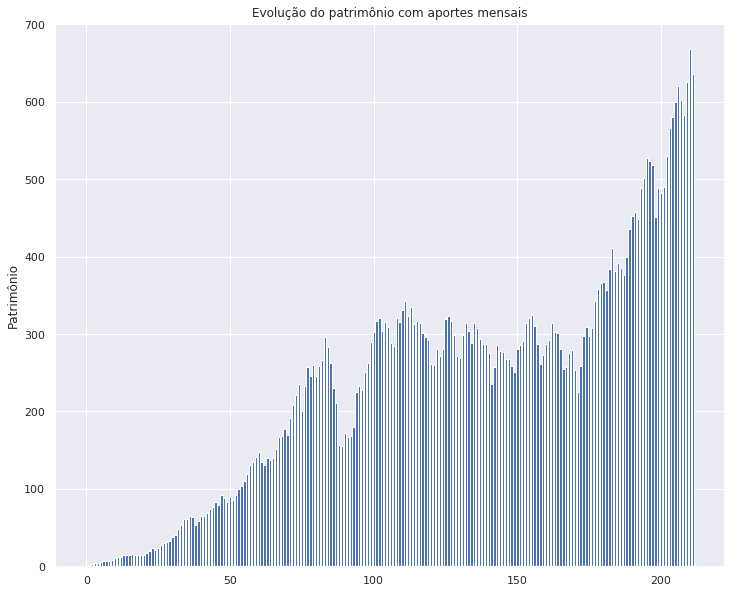

In [173]:
monthly = df.Price.values.copy()[::-1]
monthly = monthly[::22]

patrimony_monthly = [1]

for i in range(1, len(monthly)):
    perf = (monthly[i] - monthly[i - 1]) / monthly[i - 1]
    patrimony_monthly.append(patrimony_monthly[i - 1] * (1 + perf))
    patrimony_monthly[-1] += 1
    
print('Patrimônio final = {:.2f}'.format(patrimony_monthly[-1]))
plt.bar(np.array(list(range(len(patrimony_monthly)))), patrimony_monthly, align='center')
plt.ylabel('Patrimônio')
plt.title('Evolução do patrimônio com aportes mensais')

pos = list(range(0, len(patrimony_monthly), 44)).append(len(patrimony_monthly))
ticks = list(dates[::44]).append(dates[-1])

plt.xticks(pos, dates[::44])
plt.show()

Patrimônio final = 664.89


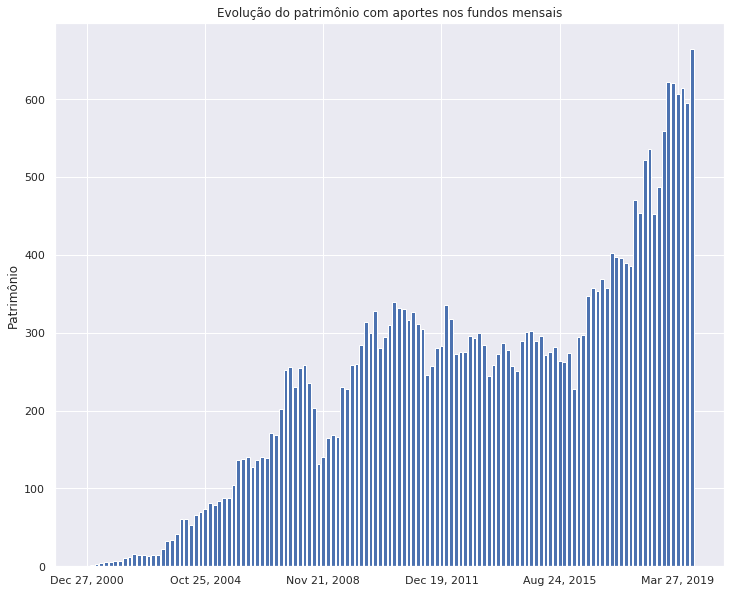

In [170]:

lows = df.min_price.values.copy()[::-1]
monthly = df.min_price.values.copy()[::-1]

patrimony_monthly = [0]
reserve = 1

pos = [0]
dates_ticks = [dates[0]]
past_points = 1
N = 22

for i in range(1, len(monthly)):
    if i % N == 0:
        reserve += 1
        
    if not math.isnan(monthly[i]):
        if len(patrimony_monthly) % 25 == 0:
            pos.append(len(patrimony_monthly))
            dates_ticks.append(dates[i])
            
        perf = (monthly[i] - past_points) / past_points
        
        patrimony_monthly.append(patrimony_monthly[-1] * (1 + perf))
        
        patrimony_monthly[-1] += reserve
        past_points = monthly[i]
        reserve = 0


perf = (df.Price.values[0] - past_points) / past_points
patrimony_monthly.append(patrimony_monthly[-1] * (1 + perf))
patrimony_monthly[-1] += reserve

print('Patrimônio final = {:.2f}'.format(patrimony_monthly[-1]))
plt.bar(np.array(list(range(len(patrimony_monthly)))), patrimony_monthly, align='center')
plt.title('Evolução do patrimônio com aportes nos fundos mensais')
plt.ylabel('Patrimônio')
plt.xticks(pos, dates_ticks)
plt.show()